In [66]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10)

# Loding Data

In [67]:
#loading dataset
loan_data = pd.read_csv(r"loan.csv")
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [68]:
loan_data.shape

(39717, 111)

In [69]:
round(100*(loan_data['pymnt_plan'].isnull().sum()/len(loan_data.index)), 2)

0.0

In [70]:
loan_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [71]:
#Checking null percentage for all the attributes
Missing_Per_of_attributes = pd.DataFrame({'Percent_Of_Missing_value':round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)})
Missing_Per_of_attributes

,Percent_Of_Missing_value
id,0.00
member_id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00


In [72]:
#creating attributes which have less than 30% null value
pct_null = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
missing_features_less_than_30pct = pct_null[pct_null < 30.00].index

In [73]:
#selecting attributes less than 30% missing vlaues
loan_data2 = loan_data[missing_features_less_than_30pct]
loan_data2.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [74]:
#Checking null percentage for all the attributes
Missing_Per_of_attributes = pd.DataFrame({'Percent_Of_Missing_value':round(100*(loan_data2.isnull().sum()/len(loan_data2.index)), 2)})
Missing_Per_of_attributes

,Percent_Of_Missing_value
id,0.00
member_id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00


In [75]:
#replacing nan value with 0 for emp_length attribute
print(loan_data2.emp_length.unique())
loan_data2.emp_length.fillna('0',inplace=True)
print(loan_data2.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [76]:
#dropping irrelevant attributes from the dataset
not_required_columns = ["id","member_id","url","zip_code"]
loan_data2.drop(labels = not_required_columns, axis =1, inplace=True)

In [77]:
print("The shape of the current dataset is",loan_data2.shape ,"rows & columns.")

The shape of the current dataset is (39717, 49) rows & columns.


In [78]:
loan_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  39717 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [79]:
loan_data2.shape

(39717, 49)

In [80]:
#replacing % from the int_rate attribte to blank
loan_data2['int_rate'] = loan_data2.int_rate.str.replace("%", "")

In [81]:
#converting int_Rate atttribute to float
loan_data2['int_rate'] = loan_data2.int_rate.astype(float)

In [82]:
loan_data2.groupby('loan_status').describe()

loan_amnt  \
                count   
loan_status             
Charged Off    5627.0   
Current        1140.0   
Fully Paid    32950.0   

                           \
                     mean   
loan_status                 
Charged Off  12104.385108   
Current      17053.991228   
Fully Paid   10866.455994   

                          \
                     std   
loan_status                
Charged Off  8085.732038   
Current      8651.052316   
Fully Paid   7199.629493   

                     \
                min   
loan_status           
Charged Off   900.0   
Current      1000.0   
Fully Paid    500.0   

                      \
                 25%   
loan_status            
Charged Off   5600.0   
Current      12000.0   
Fully Paid    5200.0   

                      \
                 50%   
loan_status            
Charged Off  10000.0   
Current      15825.0   
Fully Paid    9600.0   

                      \
                 75%   
loan_status            
Charged Off  16500.0   
Current      23000.0   
Fully Paid   15000.0   

                      \
                 max   
loan_status            
Charged Off  35000.0   
Current      35000.0   
Fully Paid   35000.0   

            funded_amnt  \
                  count   
loan_status               
Charged Off      5627.0   
Current          1140.0   
Fully Paid      32950.0   

                           \
                     mean   
loan_status                 
Charged Off  11753.398792   
Current      16485.701754   
Fully Paid   10618.520486   

                          \
                     std   
loan_status                
Charged Off  7760.516335   
Current      8183.567669   
Fully Paid   6956.047888   

                     \
                min   
loan_status           
Charged Off   900.0   
Current      1000.0   
Fully Paid    500.0   

                      \
                 25%   
loan_status            
Charged Off   5575.0   
Current      11575.0   
Fully Paid    5050.0   

                      \
                 50%   
loan_status            
Charged Off  10000.0   
Current      15225.0   
Fully Paid    9200.0   

                       \
                  75%   
loan_status             
Charged Off  16000.00   
Current      21281.25   
Fully Paid   14500.00   

                      \
                 max   
loan_status            
Charged Off  35000.0   
Current      35000.0   
Fully Paid   35000.0   

            funded_amnt_inv  \
                      count   
loan_status                   
Charged Off          5627.0   
Current              1140.0   
Fully Paid          32950.0   

                           \
                     mean   
loan_status                 
Charged Off  10864.521324   
Current      16318.265247   
Fully Paid   10112.837414   

                          \
                     std   
loan_status                
Charged Off  7661.750540   
Current      8087.613125   
Fully Paid   6901.840874   

                     \
                min   
loan_status           
Charged Off     0.0   
Current      1000.0   
Fully Paid      0.0   

                           \
                      25%   
loan_status                 
Charged Off   5000.000000   
Current      11268.803065   
Fully Paid    5000.000000   

                           \
                      50%   
loan_status                 
Charged Off   9401.209477   
Current      15000.000000   
Fully Paid    8500.000000   

                      \
                 75%   
loan_status            
Charged Off  15000.0   
Current      21050.0   
Fully Paid   13950.0   

                      \
                 max   
loan_status            
Charged Off  35000.0   
Current      35000.0   
Fully Paid   35000.0   

            int_rate  \
               count   
loan_status            
Charged Off   5627.0   
Current       1140.0   
Fully Paid   32950.0   

                        \
                  mean   
loan_status              
Charged Off  13.820432   
Current

Text(0, 0.5, 'Frequency')

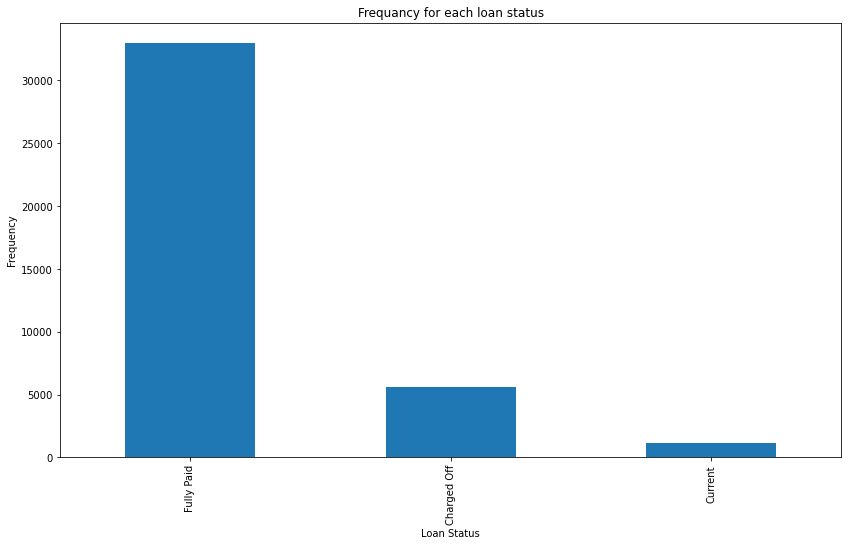

In [83]:
#Checking the loan status for all type of customer
ax = loan_data2['loan_status'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequancy for each loan status")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Frequency")

In [84]:
#analysis loan dtatus for different kind of purpose
loan_data2.purpose.groupby([loan_data2.loan_status, loan_data2.purpose]).count().unstack().fillna(0).astype(int)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,160,542,2767,56,347,59,222,106,92,633,19,475,53,96
Current,50,103,586,0,101,14,37,12,7,128,1,74,6,21
Fully Paid,1339,4485,15288,269,2528,308,1928,575,484,3232,83,1279,322,830


In [85]:
#finding the percent for different purpose of loan
(loan_data2.purpose.value_counts()*100)/len(loan_data2)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
house                  0.959287
vacation               0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

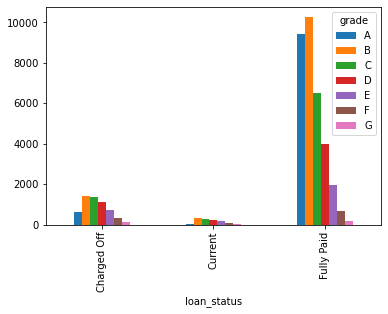

In [86]:
#analysis of relationship between loan status and grade
loan_data2.grade.groupby([loan_data2.loan_status, loan_data2.grade]).count().unstack().fillna(0).astype(int).plot.bar()
plt.show()

In [87]:
#finding the percent for different loan status
(loan_data2.loan_status.value_counts()*100)/len(loan_data2)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [88]:
#Checking Corr with dti and interest rate
correlation = loan_data2['dti']. corr(loan_data2['int_rate']) 
print(correlation)

0.11116168418161568


In [130]:
#finding highest correlations respect to dti
loan_data2.corr()['dti'].sort_values().tail(6)

total_rec_int    0.106071
int_rate         0.111162
revol_bal        0.228743
total_acc        0.229881
open_acc         0.288045
dti              1.000000
Name: dti, dtype: float64

###### As we can see interest rate have a positive correlation with dti(debit to income ratio)

Text(0, 0.5, 'Probability Density')

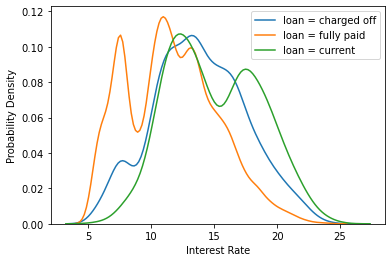

In [90]:
#plotting kde plot for interest rate for 3 types of loan status
sns.kdeplot(loan_data2.loc[loan_data2['loan_status'] == "Charged Off", 'int_rate'], label = 'loan = charged off', legend = True)
sns.kdeplot(loan_data2.loc[loan_data2['loan_status'] == "Fully Paid", 'int_rate'], label = 'loan = fully paid', legend = True)
sns.kdeplot(loan_data2.loc[loan_data2['loan_status'] == "Current", 'int_rate'], label = 'loan = current', legend = True)
plt.xlabel('Interest Rate') 
plt.ylabel('Probability Density') 

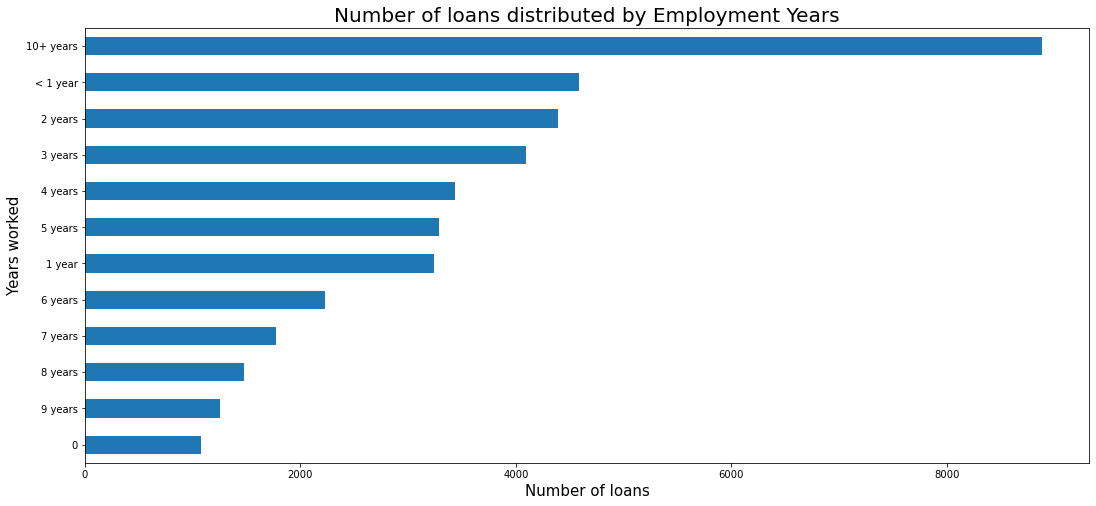

In [91]:
#Plotting no of loans given to the differnet customer based on the employment year
loan_data2['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

In [92]:
#removing columns where number of unique values is only one
unique = loan_data2.nunique()
unique = unique[unique.values == 1]
loan_data2.drop(labels = list(unique.index), axis =1, inplace=True)

##### For simplicity we only use Charged off(Default) and Fully Paid. Current is not so important for us because we have to find the behaviour of the defaulters

In [93]:
loan_data3 = loan_data2[(loan_data2.loan_status == "Charged Off") | (loan_data2.loan_status == "Fully Paid")]

In [94]:
loan_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  float64
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_title                36191 non-null  object 
 9   emp_length               38577 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status           

In [95]:
#finding the percent for different loan status
(loan_data3.loan_status.value_counts()*100)/len(loan_data3)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [96]:
# converting the loan status into 0(non_defaluters) and 1(defaulters)
loan_data3['defaulter'] = loan_data3.loan_status.replace(to_replace=['Fully Paid', 'Charged Off'], value=[0, 1])

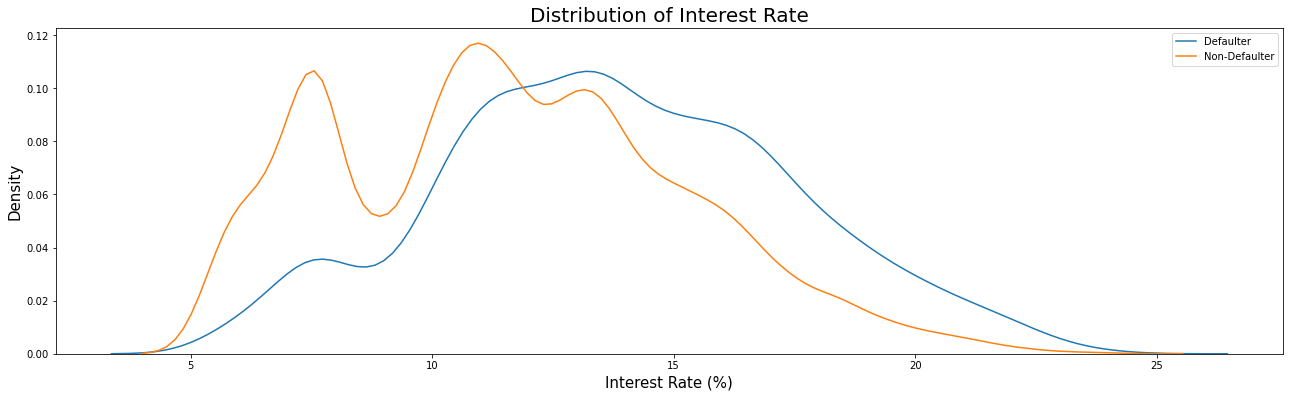

In [97]:
#plotting a density plot on interest_rate vs dti
fig = plt.figure(figsize=(22,6))
sns.kdeplot(loan_data3.loc[loan_data3['defaulter'] == 1, 'int_rate'], label = 'Defaulter')
sns.kdeplot(loan_data3.loc[loan_data3['defaulter'] == 0, 'int_rate'], label = 'Non-Defaulter');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

In [98]:
#finding the percent for different dafaulter
(loan_data3.defaulter.value_counts()*100)/len(loan_data3)

0    85.413588
1    14.586412
Name: defaulter, dtype: float64

In [99]:
#finding the top positive and negative corr with defaluter attribute
corr = loan_data3.corr()['defaulter'].sort_values(ascending = True)

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 funded_amnt                0.056497
loan_amnt                  0.059463
inq_last_6mths             0.071878
total_rec_late_fee         0.165115
collection_recovery_fee    0.204914
int_rate                   0.211390
recoveries                 0.339562
defaulter                  1.000000
out_prncp                       NaN
out_prncp_inv                   NaN
Name: defaulter, dtype: float64

Most Negative Correlations:
 total_rec_prncp   -0.334944
total_pymnt       -0.235898
total_pymnt_inv   -0.232906
last_pymnt_amnt   -0.222524
annual_inc        -0.040867
total_acc         -0.022608
open_acc          -0.009140
revol_bal          0.005854
total_rec_int      0.013008
delinq_2yrs        0.020096
Name: defaulter, dtype: float64


In [100]:
#Funciton to calculate relationship between two variable
def bi_corr(df, col1, col2):
  """
  This funciton helps to find the correlation between two variable

  df = DataFrame
  col1 = The attribute of the DataFrame
  col2 = Attribute of the dataframe
  """
  dict_dataframe = {col1: df[col1], col2: df[col2]}
  df = pd.DataFrame(dict_dataframe)
  return df.apply(lambda x: pd.factorize(x)[0]).corr(method = 'pearson', min_periods = 1)

In [101]:
#Finding corr betwen grade and defaulter
bi_corr(loan_data3, 'grade', 'defaulter')

,grade,defaulter
grade,1.000000,0.104415
defaulter,0.104415,1.000000


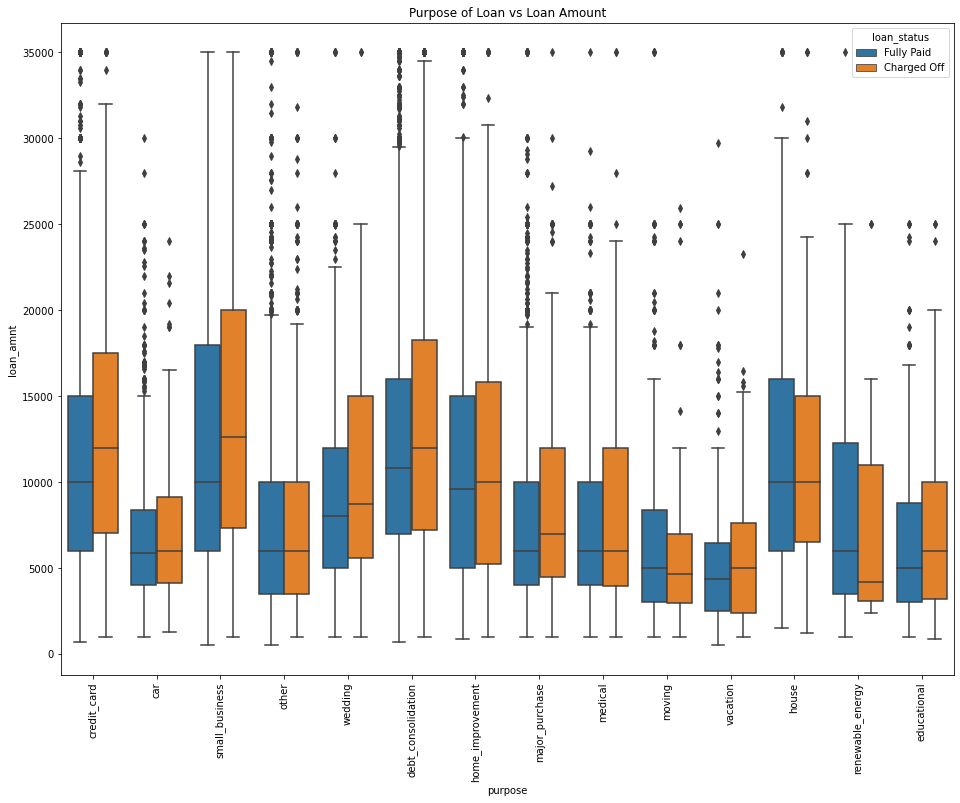

In [102]:
#Boxplot for Purpose of Loan VS Loan Amount
plt.figure(figsize=(16,12))
sns.boxplot(data =loan_data3, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation=90)
plt.show()

In [103]:
#Finding corr betwen purpose and defaulter
bi_corr(loan_data3, 'purpose', 'defaulter')

,purpose,defaulter
purpose,1.000000,0.010388
defaulter,0.010388,1.000000


In [104]:
#Writing the function for crosstab
def crosstab(df,col):
    """
    This function helps to evaluate a crosstab and also add a varibale named Default Rate to the crosstab

    df : DataFrame
    col: Attribute of the datafame
    """
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Default Rate'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [105]:
# Finding Defalut Rate
def default_rate(df,col,stacked= True):
    """
    This funciton helps to plot the Default Rate vs various attributes

    df      : DataFrame
    col     : Attribute Name
    stacked : True(default) for Stacked Bar
    """
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Default Rate']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.set_title(df[col].name.title()+' vs Default Rate',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Default rate',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

loan_status,Charged Off,Fully Paid,All,Default Rate
addr_state,,,,
NJ,278,1512,1790,0.155
NM,30,153,183,0.164
NV,108,371,479,0.225
NY,495,3203,3698,0.134
OH,155,1023,1178,0.132
OK,40,247,287,0.139
OR,71,364,435,0.163
PA,180,1288,1468,0.123
RI,25,169,194,0.129


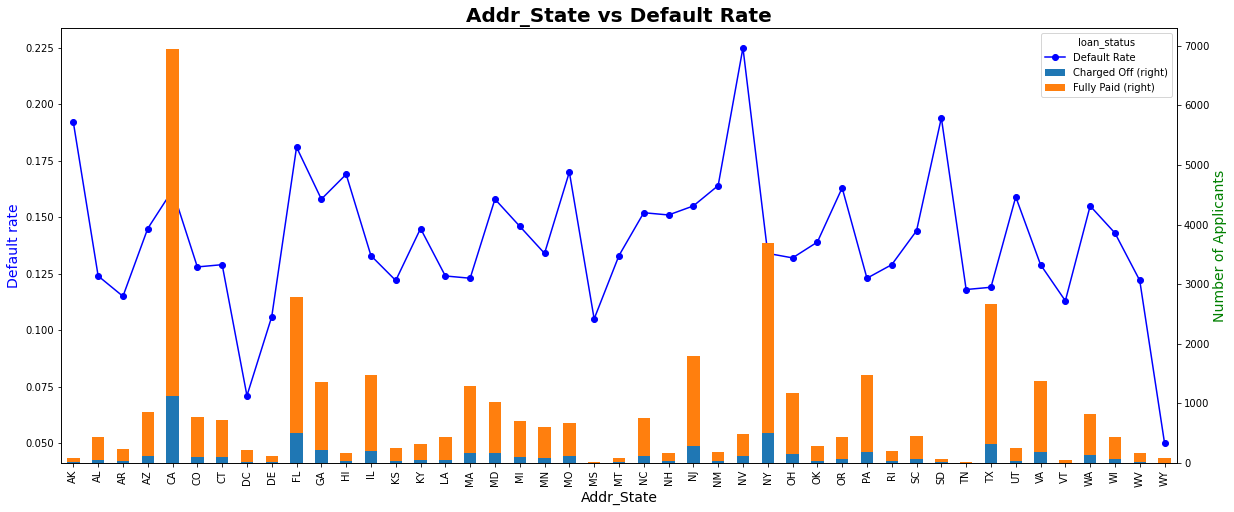

In [106]:
#Analysisng Defalut Rate for State
filter_states = loan_data3.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan_data3.drop(labels = loan_data3[loan_data3.addr_state.isin(filter_states.index)].index)

states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

default_rate(df =loan_filter_states,col ='addr_state')

loan_status,Charged Off,Fully Paid,All,Default Rate
purpose,,,,
car,160,1339,1499,0.107
credit_card,542,4485,5027,0.108
debt_consolidation,2767,15288,18055,0.153
educational,56,269,325,0.172
home_improvement,347,2528,2875,0.121
house,59,308,367,0.161
major_purchase,222,1928,2150,0.103
medical,106,575,681,0.156
moving,92,484,576,0.160


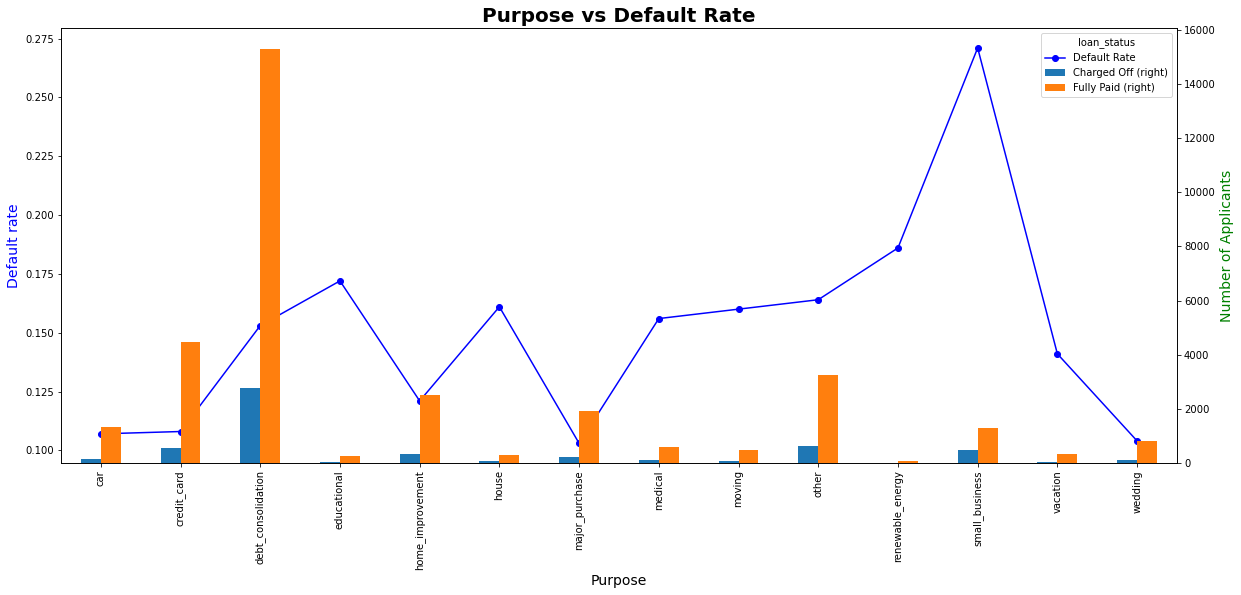

In [107]:
#Analysing Default Rate for purpose
purpose = crosstab(loan_data3,'purpose')
display(purpose)

default_rate(df =loan_data3,col ='purpose',stacked=False)

loan_status,Charged Off,Fully Paid,All,Default Rate
grade,,,,
A,602,9443,10045,0.060
B,1425,10250,11675,0.122
C,1347,6487,7834,0.172
D,1118,3967,5085,0.220
E,715,1948,2663,0.268
F,319,657,976,0.327
G,101,198,299,0.338


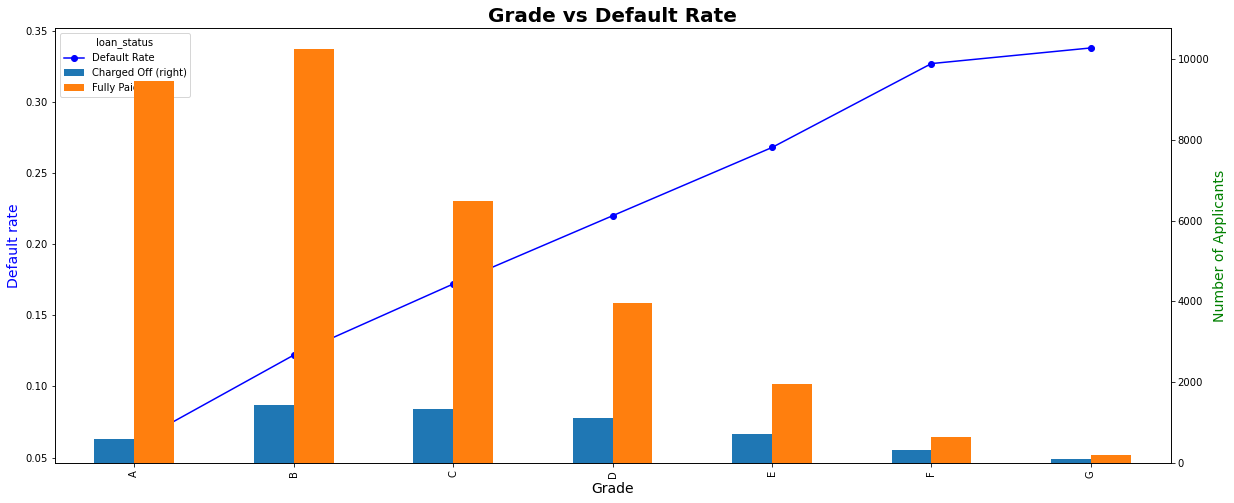

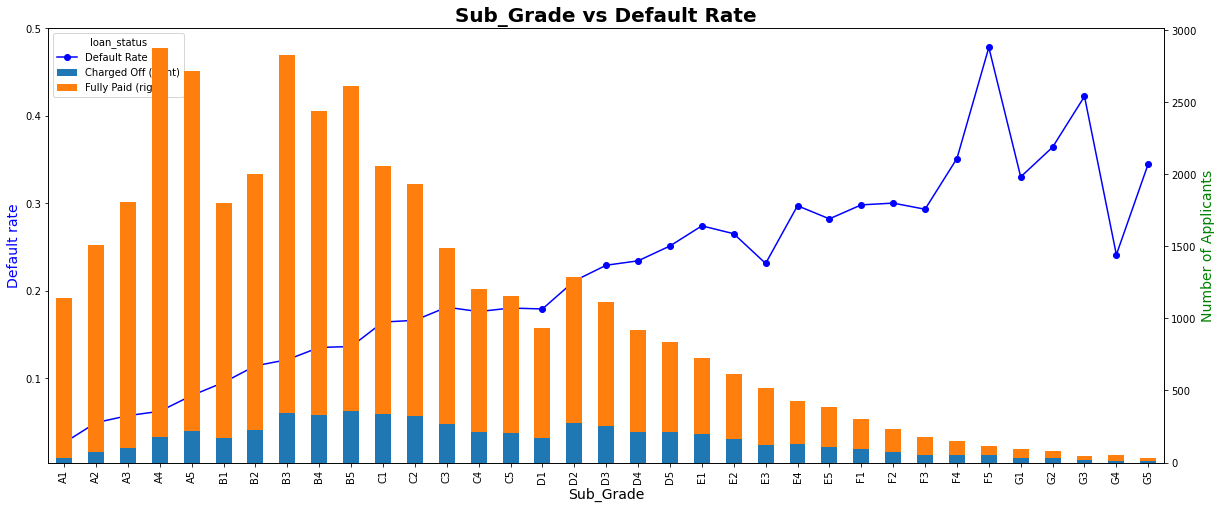

In [108]:
#Analysing Default Rate for Grade & Subgrade
grade = crosstab(loan_data3,'grade')
display(grade)

default_rate(df =loan_data3, col ='grade',stacked=False)
default_rate(df =loan_data3, col ='sub_grade')

In [109]:
#Finding corr between grade and subgrade
bi_corr(loan_data3, 'grade', 'sub_grade')

,grade,sub_grade
grade,1.000000,0.549652
sub_grade,0.549652,1.000000


<AxesSubplot:xlabel='int_rate'>

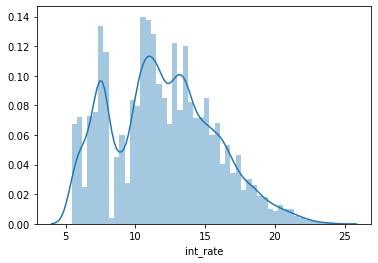

In [110]:
#Verifying the distribution of the interest rate
sns.distplot(loan_data3['int_rate'])

In [111]:
#Based on the distribution created the bins and slot for the interest rates and created the attribute int_rate_range
bins = [0, 8, 10, 13, 16, 20]
slot = ['0-8', '8-10', '10-13', '13-16', '16 and above']
loan_data3['int_rate_range'] = pd.cut(loan_data3['int_rate'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Default Rate
int_rate_range,,,,
0-8,440,7778,8218,0.054
8-10,390,3708,4098,0.095
10-13,1591,10091,11682,0.136
13-16,1644,7527,9171,0.179
16 and above,1266,3372,4638,0.273


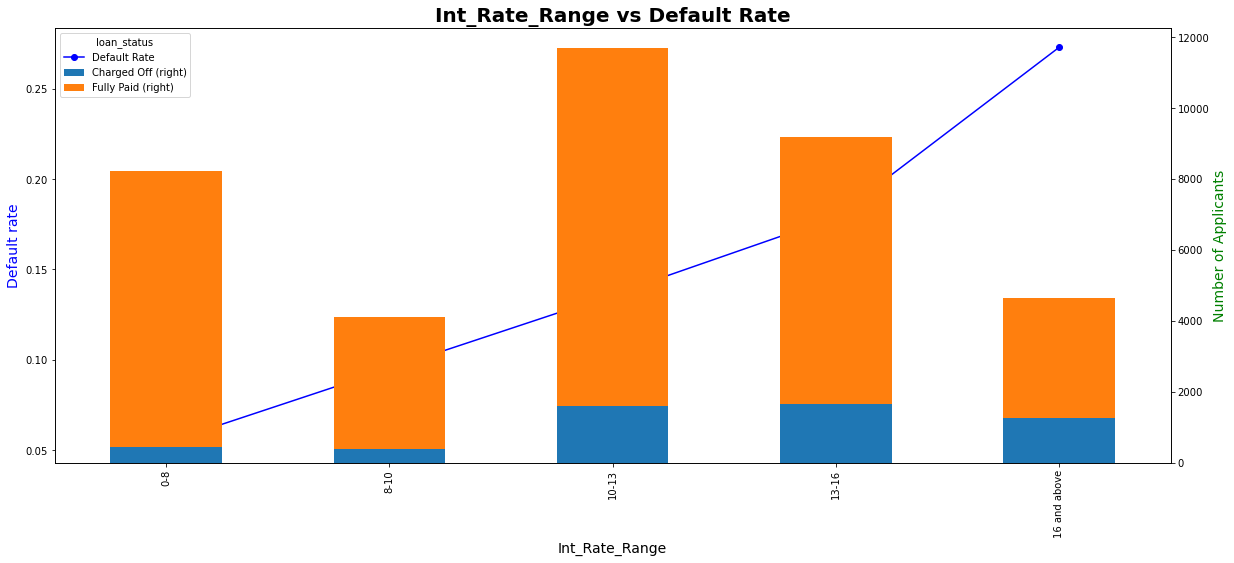

In [112]:
#Analysing Defalut Rate for different interest rate
int_rate_range = crosstab(loan_data3,'int_rate_range')
display(int_rate_range)

default_rate(df =loan_data3,col ='int_rate_range')

loan_status,Charged Off,Fully Paid,All,Default Rate
emp_length,,,,
0,228,805,1033,0.221
1 year,456,2713,3169,0.144
10+ years,1331,7157,8488,0.157
2 years,567,3724,4291,0.132
3 years,555,3457,4012,0.138
4 years,462,2880,3342,0.138
5 years,458,2736,3194,0.143
6 years,307,1861,2168,0.142
7 years,263,1448,1711,0.154


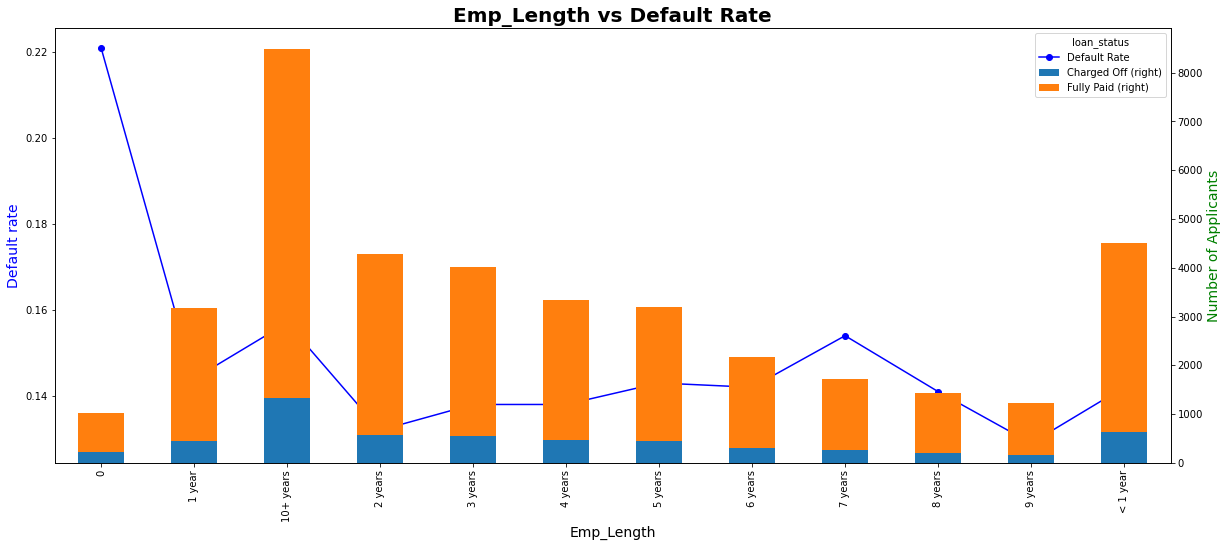

In [113]:
#Analysing Defalut Rate for different employbility length
emp_length = crosstab(loan_data3,'emp_length')
display(emp_length)

default_rate(df =loan_data3,col ='emp_length')

loan_status,Charged Off,Fully Paid,All,Default Rate
term,,,,
36 months,3227,25869,29096,0.111
60 months,2400,7081,9481,0.253


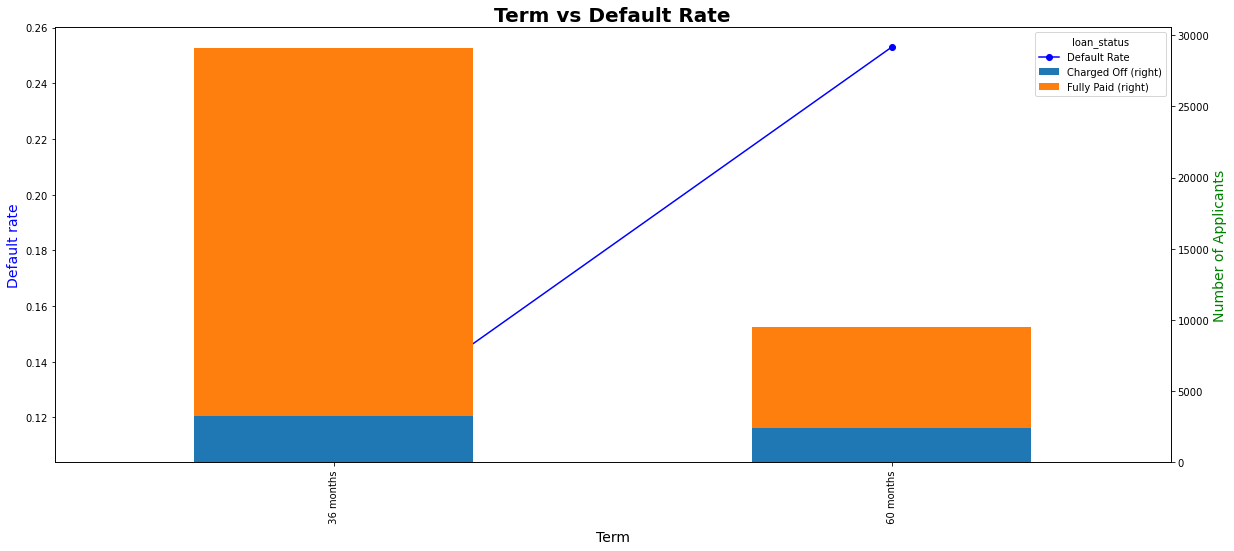

In [114]:
#Analysing Defalut Rate for term
emp_length = crosstab(loan_data3,'term')
display(emp_length)

default_rate(df =loan_data3,col ='term')

<AxesSubplot:xlabel='annual_inc'>

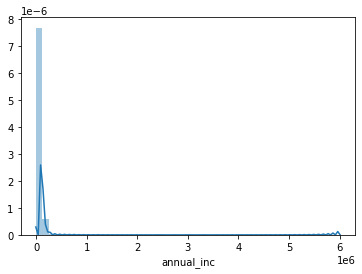

In [115]:
#Verifying the distribution of the annual income
sns.distplot(loan_data3['annual_inc'])

In [116]:
#Verifying the distribution of the annual income
loan_data3['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [117]:
#converting annual_inc attribute to int
loan_data3['annual_inc'] = loan_data3['annual_inc'].astype(int)

In [118]:
#analysing the spread of the annual_inc
loan_data3["annual_inc"].describe().apply(lambda x: format(x, 'f'))

count      38577.000000
mean       68777.967157
std        64218.682394
min         4000.000000
25%        40000.000000
50%        58868.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [119]:
#Creating a annual income range column
bins = [0, 20000, 40000, 60000, 80000, 100000, 2000000]
slot = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 and 100000', '100000 and above']
loan_data3['annual_inc_range'] = pd.cut(loan_data3['annual_inc'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Default Rate
annual_inc_range,,,,
0-20000,237,943,1180,0.201
20000-40000,1514,7004,8518,0.178
40000-60000,1729,9534,11263,0.154
60000-80000,1024,6597,7621,0.134
80000 and 100000,531,3983,4514,0.118
100000 and above,592,4886,5478,0.108


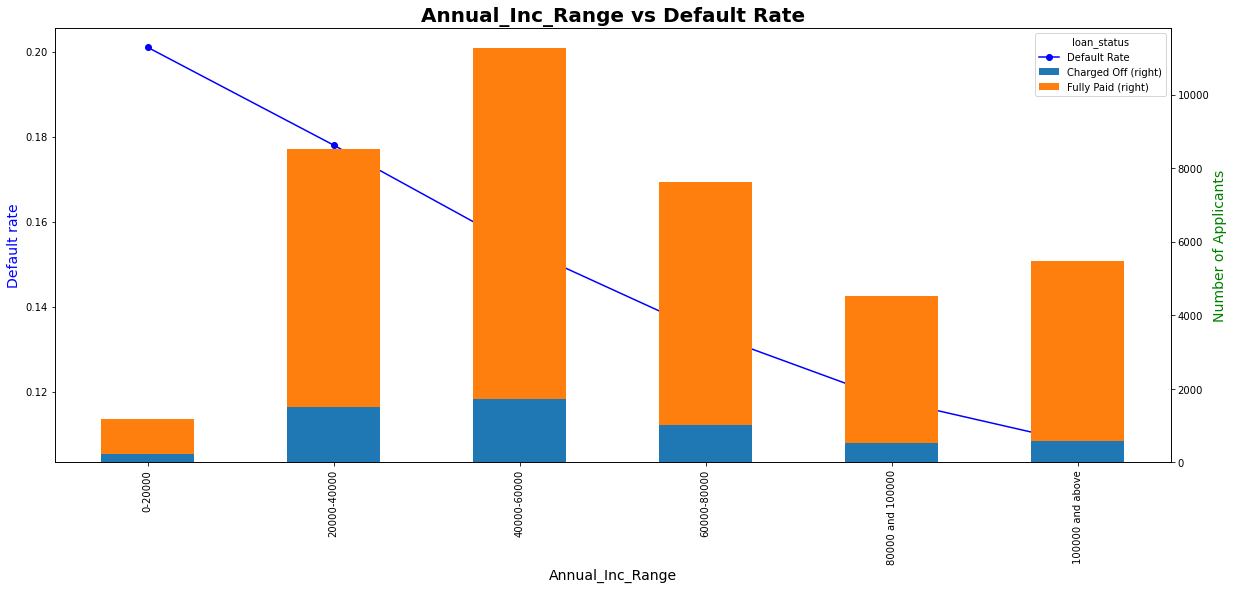

In [120]:
#Analysing the defalut rate for different types of annual income
annual_inc_range = crosstab(loan_data3,'annual_inc_range')
display(annual_inc_range)

default_rate(df =loan_data3,col ='annual_inc_range')

In [121]:
#finding the top positive and negative corr with annual_inc attribute
corr = loan_data3.corr()['annual_inc'].sort_values(ascending = False)

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 delinq_2yrs                0.022229
recoveries                 0.022184
collection_recovery_fee    0.015981
total_rec_late_fee         0.006814
pub_rec_bankruptcies      -0.016224
pub_rec                   -0.017864
defaulter                 -0.040867
dti                       -0.121530
out_prncp                       NaN
out_prncp_inv                   NaN
Name: annual_inc, dtype: float64

Most Negative Correlations:
 annual_inc         1.000000
revol_bal          0.277374
loan_amnt          0.268999
installment        0.267842
funded_amnt        0.264798
total_rec_prncp    0.256848
total_pymnt        0.256313
funded_amnt_inv    0.251981
total_pymnt_inv    0.245198
total_acc          0.234534
Name: annual_inc, dtype: float64


In [122]:
#Analysing the spread of the loan amount
loan_data3['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:title={'center':'Box Plot'}, ylabel='loan_amnt'>

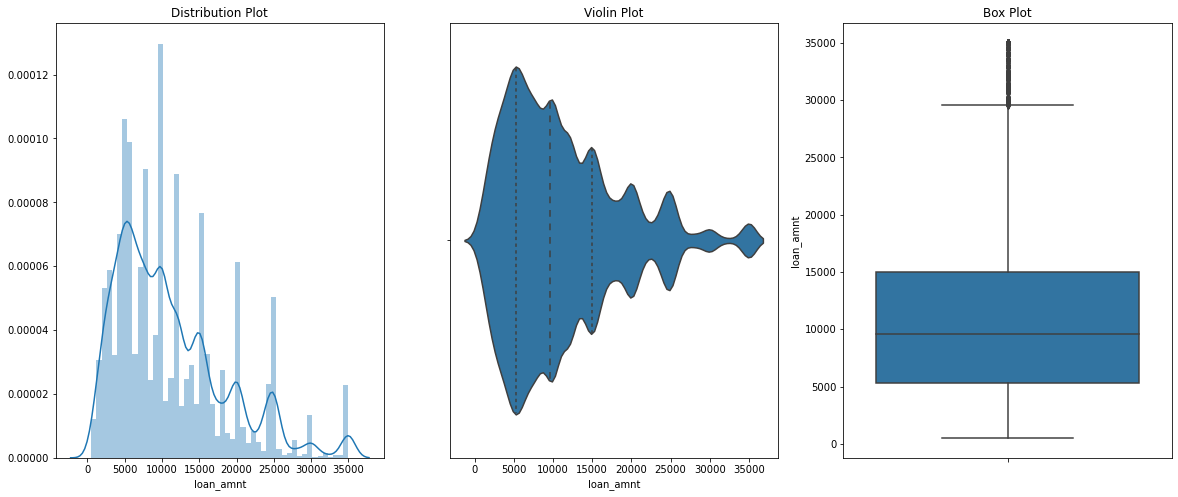

In [123]:
#Analysing and plotting the spread of the loan amount
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan_data3['loan_amnt'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan_data3, x='loan_amnt',ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan_data3, x='loan_amnt',ax=ax[2],orient='v')

In [124]:
#Creating a annual income range column
bins = [0, 10000, 20000, 30000, 40000]
slot = ['0-15000', '15000-25000', '25000-35000', '35000 and above']
loan_data3['loan_amnt_range'] = pd.cut(loan_data3['loan_amnt'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Default Rate
loan_amnt_range,,,,
0-15000,2956,19318,22274,0.133
15000-25000,1806,10226,12032,0.150
25000-35000,685,2851,3536,0.194
35000 and above,180,555,735,0.245


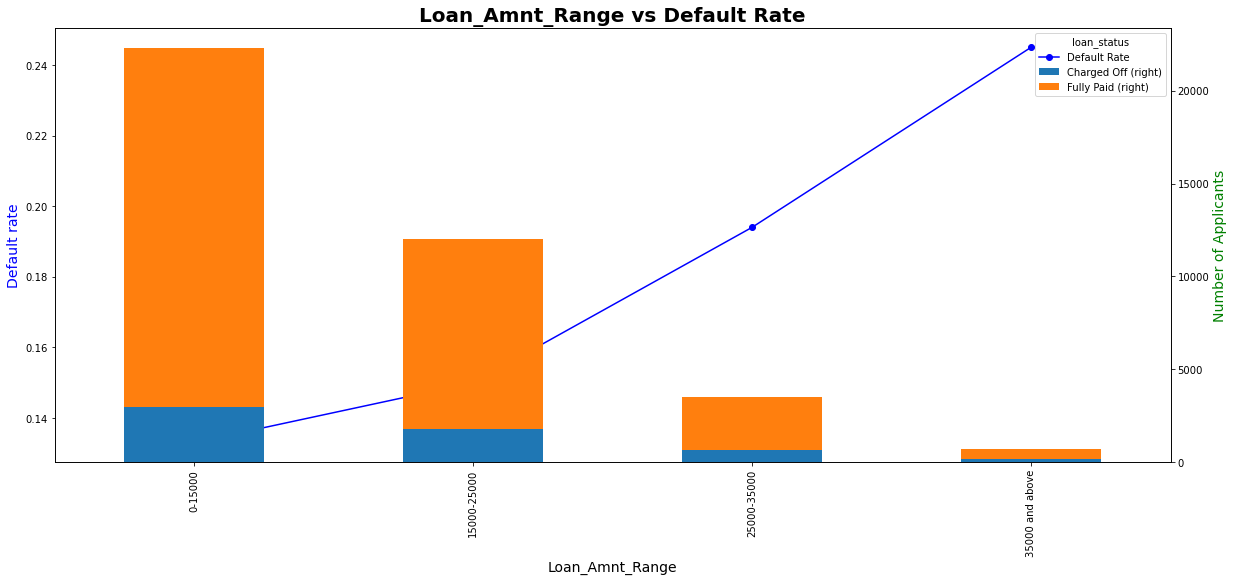

In [125]:
#Analysing the defalut rate for different types of annual income
annual_inc_range = crosstab(loan_data3,'loan_amnt_range')
display(annual_inc_range)

default_rate(df =loan_data3,col ='loan_amnt_range')

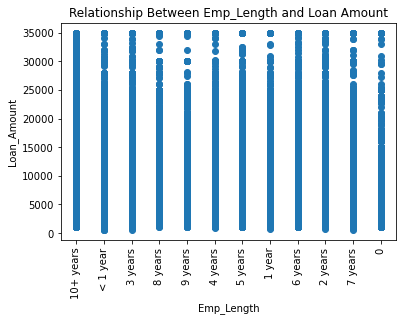

In [126]:
#Analysing the raltionship between the loan-amt and the Employbiloty Length
x = loan_data3['emp_length']
y = loan_data3['loan_amnt']
plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.xticks(rotation=90)
plt.title('Relationship Between Emp_Length and Loan Amount')
plt.xlabel('Emp_Length')
plt.ylabel('Loan_Amount')
plt.show()

In [127]:
#Drop two unimportant columns
loan_data3.drop(['out_prncp', 'out_prncp_inv', 'pub_rec_bankruptcies', 'collection_recovery_fee', 'delinq_2yrs', 'inq_last_6mths',
'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'recoveries', 'total_rec_late_fee'], axis = 1, inplace =True)

In [128]:
#Finding Corrleation between loan_data
loan_correlation = loan_data3.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,defaulter
loan_amnt,1.000000,0.981790,0.937922,0.301265,0.932260,0.268999,0.062436,0.881910,0.847635,0.845870,0.728343,0.474614,0.059463
funded_amnt,0.981790,1.000000,0.956172,0.304930,0.958035,0.264798,0.062194,0.898709,0.864501,0.864082,0.736654,0.478448,0.056497
funded_amnt_inv,0.937922,0.956172,1.000000,0.297473,0.905464,0.251981,0.070663,0.874730,0.909127,0.838587,0.726736,0.469166,0.037781
int_rate,0.301265,0.304930,0.297473,1.000000,0.277203,0.048899,0.110913,0.290661,0.284932,0.174717,0.521233,0.174377,0.211390
installment,0.932260,0.958035,0.905464,0.277203,1.000000,0.267842,0.052038,0.858493,0.817665,0.847762,0.642655,0.413588,0.027153
annual_inc,0.268999,0.264798,0.251981,0.048899,0.267842,1.000000,-0.121530,0.256313,0.245198,0.256848,0.185056,0.143242,-0.040867
dti,0.062436,0.062194,0.070663,0.110913,0.052038,-0.121530,1.000000,0.059274,0.066277,0.036755,0.103104,0.008566,0.045078
total_pymnt,0.881910,0.898709,0.874730,0.290661,0.858493,0.256313,0.059274,1.000000,0.968580,0.973542,0.822434,0.511535,-0.235898
total_pymnt_inv,0.847635,0.864501,0.909127,0.284932,0.817665,0.245198,0.066277,0.968580,1.000000,0.940299,0.805936,0.500067,-0.232906
total_rec_prncp,0.845870,0.864082,0.838587,0.174717,0.847762,0.256848,0.036755,0.973542,0.940299,1.000000,0.683521,0.567463,-0.334944


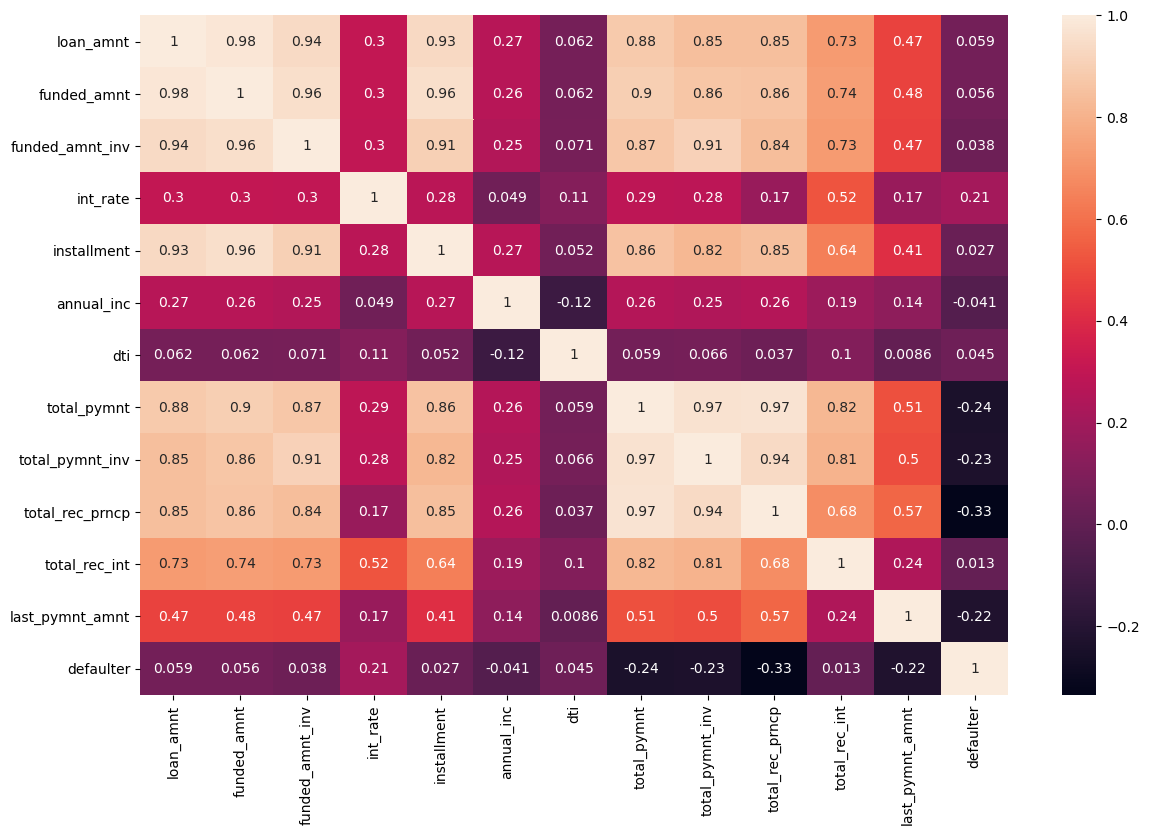

In [129]:
#Plotting the correlation heatmap
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

Important Attributes:
- Loan Amount
-Grade
-Term
-Interest Rate
-Annual Income
-Purpose